In [2]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from itertools import cycle
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
import os
import cv2

In [3]:
sample_name = "sample1_frames"
save_fol = "./results/segmentation/"
path_dir = '/home/pranjali/Documents/AnomalyDetection/sample_seq/' + sample_name + '/'

path_dir = '/media/god-particle/DA48D0B148D08D9F/shaantanu_honours/data/color/'
# path_dir = './'


In [53]:
def generate_segmentation(file):
    global curr_counter
    with curr_counter.get_lock():
        print(f"Starting segmentation for {file} , {curr_counter.value} \n")
        curr_counter.value += 1
    img = Image.open(path_dir + file)
    img = np.array(img)
    shape = img.shape
    reshaped_img = np.reshape(img, [-1,3])
    bandwidth = estimate_bandwidth(reshaped_img, quantile=0.1, n_samples=100)
    msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    nsamples, nx, ny = img.shape
    msc.fit(reshaped_img)
    labels = msc.labels_
    seg_image = np.reshape(labels, shape[:2])

    cv2.imwrite(save_fol+file , seg_image)

    print(f"save done for {file} \n")

### Parallel processing

In [51]:
from multiprocessing import Pool,Manager,Value

In [54]:
filelist= [file for file in os.listdir(path_dir) if file.endswith('.png')]
filelist.sort()

curr_counter = Value('i',0)


with Pool() as pool:
    pool.map(generate_segmentation,filelist)


# processes = []
# for file in filelist[:10]:
#     print("here",file)
#     p = multiprocessing.Process(target=generate_segmentation,args=(file,))
#     p.start()
#     processes.append(p)

# for p in processes:
#     p.join()

Starting segmentation for 16727529345031114000.png , 0 

Starting segmentation for 16727529358397498000.png , 1 

Starting segmentation for 16727529371967535000.png , 2 

Starting segmentation for 16727529385925746000.png , 3 

Starting segmentation for 16727529400353878000.png , 4 

Starting segmentation for 16727529414892118000.png , 5 

Starting segmentation for 16727529428990164000.png , 6 

Starting segmentation for 16727529443120866000.png , 7 



KeyboardInterrupt: 

### Sequential

16727529345031114000.png
msc done!
(720, 1280)


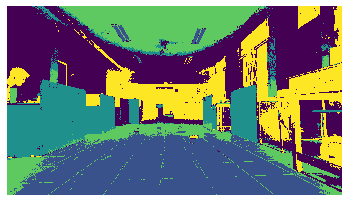

save done for 16727529345031114000.png
16727529345440216000.png
msc done!


KeyboardInterrupt: 

In [7]:
sample_name = "sample1_frames"
save_fol = "./results/segmentation/"
path_dir = '/home/pranjali/Documents/AnomalyDetection/sample_seq/' + sample_name + '/'

path_dir = '/media/god-particle/DA48D0B148D08D9F/shaantanu_honours/data/color/'
# path_dir = './'


filelist= [file for file in os.listdir(path_dir) if file.endswith('.png')]
filelist.sort()
for file in filelist:
    img = Image.open(path_dir + file)
    img = np.array(img)
    shape = img.shape
    reshaped_img = np.reshape(img, [-1,3])
    bandwidth = estimate_bandwidth(reshaped_img, quantile=0.1, n_samples=100)
    msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    nsamples, nx, ny = img.shape
    msc.fit(reshaped_img)
    labels = msc.labels_
    seg_image = np.reshape(labels, shape[:2])

    cv2.imwrite(save_fol+file , seg_image)

    print(f"save done for {file}")

In [9]:
 cv2.imwrite(save_fol+file , seg_image)

True